In [ ]:
import os

os.listdir('.')

# os.chdir('C:/Users/0974/Documents/Google Colab/Datasets')

['california_housing_train.csv',
 'heart.csv',
 'iris.csv',
 'pima-indians-diabetes.csv',
 'sonar.csv']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
filename = 'pima-indians-diabetes.csv'

dataset = pd.read_csv(filename)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(dataset['Outcome'].value_counts())

In [ ]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Exploratory Data Analysis (EDA)

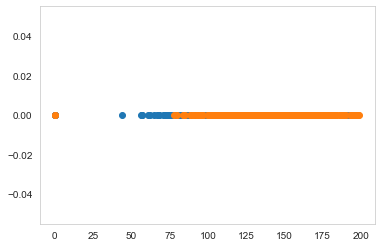

In [ ]:
# Mengambil sample perbandingan kadar glukosa pada penderita diabetes dan non-perderita
zero = dataset.loc[dataset["Outcome"] == 0]
one = dataset.loc[dataset["Outcome"] == 1]
plt.plot(zero["Glucose"], np.zeros_like(zero["Glucose"]), 'o')
plt.plot(one["Glucose"], np.zeros_like(one["Glucose"]), 'o')

plt.grid()
plt.show()

In [ ]:
# sb.set_style("whitegrid");
# sb.pairplot(dataset, hue="Outcome", size=3);
# plt.show()

In [ ]:
# Mengecek apa ada data yang kosong 
for i in dataset.columns:
    print(i, ': ', len(dataset[dataset[i].isnull()][i]))

Pregnancies :  0
Glucose :  0
BloodPressure :  0
SkinThickness :  0
Insulin :  0
BMI :  0
DiabetesPedigreeFunction :  0
Age :  0
Outcome :  0


In [ ]:
for i in dataset.columns:
    if i == 'SkinThickness':
        y = np.array(dataset[i])
        zero = np.count_nonzero( y == 0)
        print(zero)

227


In [ ]:
dataset_filtered = dataset[dataset['BloodPressure'] != 0]
dataset_filtered_bmi = dataset_filtered[dataset_filtered['BMI'] == 0]
dataset_filtered_glu = dataset_filtered[dataset_filtered['Glucose'] != 0]

dataset_filtered_bmi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
684,5,136,82,0,0,0.0,0.640,69,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

feature = dataset.drop(['Outcome'], axis=1)
label = dataset['Outcome']

feature_scaled = scaler.fit_transform(feature.values)

In [ ]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25, random_state=4)

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
feature_train, label_train = smt.fit_sample(feature_train, label_train)
np.bincount(label_train)

array([374, 374], dtype=int64)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost

In [ ]:
names = ["Random Forest Classifier estimator 20", "Random Forest Classifier estimator 40","Random Forest Classifier estimator 60","Random Forest Classifier estimator 80","SVM RBF","SVM Linear","SVM Polynomial", "Linear SVC", "K-Nearest Neighbors k=1", "K-Nearest Neighbors k=3", "K-Nearest Neighbors k=5", "K-Nearest Neighbors k=7", "K-Nearest Neighbors k=9", "K-Nearest Neighbors k=11", "K-Nearest Neighbors k=13", "K-Nearest Neighbors k=15", "Decision Tree Classifier", "Neural Network Classifier", "Ada Boost Classifier", "Naive Bayes", "QDA"]

classifiers = [RandomForestClassifier(n_estimators=20 , bootstrap=True, max_features="sqrt"),
RandomForestClassifier(n_estimators =40 , bootstrap=True, max_features="sqrt"),
RandomForestClassifier(n_estimators =60 , bootstrap=True, max_features="sqrt"),
RandomForestClassifier(n_estimators =80 , bootstrap=True, max_features="sqrt"),
SVC(kernel='rbf'),
SVC(kernel='linear'),
SVC(kernel='poly'),
LinearSVC(),
KNeighborsClassifier(n_neighbors=1),
KNeighborsClassifier(n_neighbors=3),
KNeighborsClassifier(n_neighbors=5),
KNeighborsClassifier(n_neighbors=7),
KNeighborsClassifier(n_neighbors=9),
KNeighborsClassifier(n_neighbors=11),
KNeighborsClassifier(n_neighbors=13),
KNeighborsClassifier(n_neighbors=15),
DecisionTreeClassifier(max_depth=5),
MLPClassifier(alpha=1, max_iter=1000),
AdaBoostClassifier(n_estimators=50, learning_rate=1),
GaussianNB(),
QuadraticDiscriminantAnalysis()
 ]

In [ ]:
def nClassifier(name, classifier):
    for n in range(len(name)):
        classifier[n].fit(feature_train, label_train)
        label_pred = classifier[n].predict(feature_test)
        print('Accuracy of', name[n], 'on test set: {:.3f}'.format(classifier[n].score(feature_test, label_test)))
        print('F1 Score: {:.3f}'.format(f1_score(label_test, label_pred, average="macro")))
        print('Precision Score: {:.3f}'.format(precision_score(label_test, label_pred, average="macro")))
        print('Recall Score: {:.3f}'.format(recall_score(label_test, label_pred, average="macro")))
        print(" ")
    return

In [ ]:
nClassifier(names, classifiers)

Accuracy of Random Forest Classifier estimator 20 on test set: 0.750
F1 Score: 0.732
Precision Score: 0.727
Recall Score: 0.741
 
Accuracy of Random Forest Classifier estimator 40 on test set: 0.755
F1 Score: 0.738
Precision Score: 0.733
Recall Score: 0.749
 
Accuracy of Random Forest Classifier estimator 60 on test set: 0.760
F1 Score: 0.744
Precision Score: 0.740
Recall Score: 0.756
 
Accuracy of Random Forest Classifier estimator 80 on test set: 0.781
F1 Score: 0.770
Precision Score: 0.766
Recall Score: 0.790
 
Accuracy of SVM RBF on test set: 0.724
F1 Score: 0.713
Precision Score: 0.714
Recall Score: 0.736
 
Accuracy of SVM Linear on test set: 0.745
F1 Score: 0.729
Precision Score: 0.724
Recall Score: 0.741
 
Accuracy of SVM Polynomial on test set: 0.755
F1 Score: 0.724
Precision Score: 0.729
Recall Score: 0.720
 
Accuracy of Linear SVC on test set: 0.766
F1 Score: 0.749
Precision Score: 0.744
Recall Score: 0.760
 
Accuracy of K-Nearest Neighbors k=1 on test set: 0.693
F1 Score: 0.

Akurasi tertinggi ditemukan pada andom Forest Classifier estimator 80 sebesar: 0.781